In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading and Exploring the Dataset

In [2]:
possum_df = pd.read_csv("possum.csv")
possum_df

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102,7,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103,7,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


In [3]:
possum_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


In [4]:
possum_df['site'].value_counts()

site
1    33
7    18
2    13
6    13
5    13
3     7
4     7
Name: count, dtype: int64

In [5]:
possum_df['sex'].value_counts()

sex
m    61
f    43
Name: count, dtype: int64

In [6]:
possum_df['Pop'].value_counts()

Pop
other    58
Vic      46
Name: count, dtype: int64

In [7]:
possum_df.describe()

,case,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
count,104.000000,104.000000,102.000000,104.000000,104.000000,104.000000,104.000000,103.000000,104.000000,104.000000,104.000000,104.000000
mean,52.500000,3.625000,3.833333,92.602885,56.883654,87.088462,37.009615,68.459223,48.130769,15.046154,27.000000,32.586538
std,30.166206,2.349086,1.909244,3.573349,3.113426,4.310549,1.959518,4.395306,4.109380,1.050374,2.045597,2.761949
min,1.000000,1.000000,1.000000,82.500000,50.000000,75.000000,32.000000,60.300000,40.300000,12.800000,22.000000,25.000000
25%,26.750000,1.000000,2.250000,90.675000,54.975000,84.000000,35.875000,64.600000,44.800000,14.400000,25.500000,31.000000
50%,52.500000,3.000000,3.000000,92.800000,56.350000,88.000000,37.000000,68.000000,46.800000,14.900000,27.000000,32.500000
75%,78.250000,6.000000,5.000000,94.725000,58.100000,90.000000,38.000000,72.500000,52.000000,15.725000,28.000000,34.125000
max,104.000000,7.000000,9.000000,103.100000,68.600000,96.500000,43.000000,77.900000,56.200000,17.800000,32.000000,40.000000


In [8]:
possum_df['age'] = possum_df['age'].fillna(3)
possum_df['footlgth'] = possum_df['footlgth'].fillna(possum_df['footlgth'].median())
possum_df['sex'] = possum_df['sex'].map({'m':0,'f':1})
possum_df['Pop'] = possum_df['Pop'].map({'other':0,'Vic':1})
possum_df = possum_df.drop(['case'],axis=1)

# Visualizing the Dataset

### Histogram

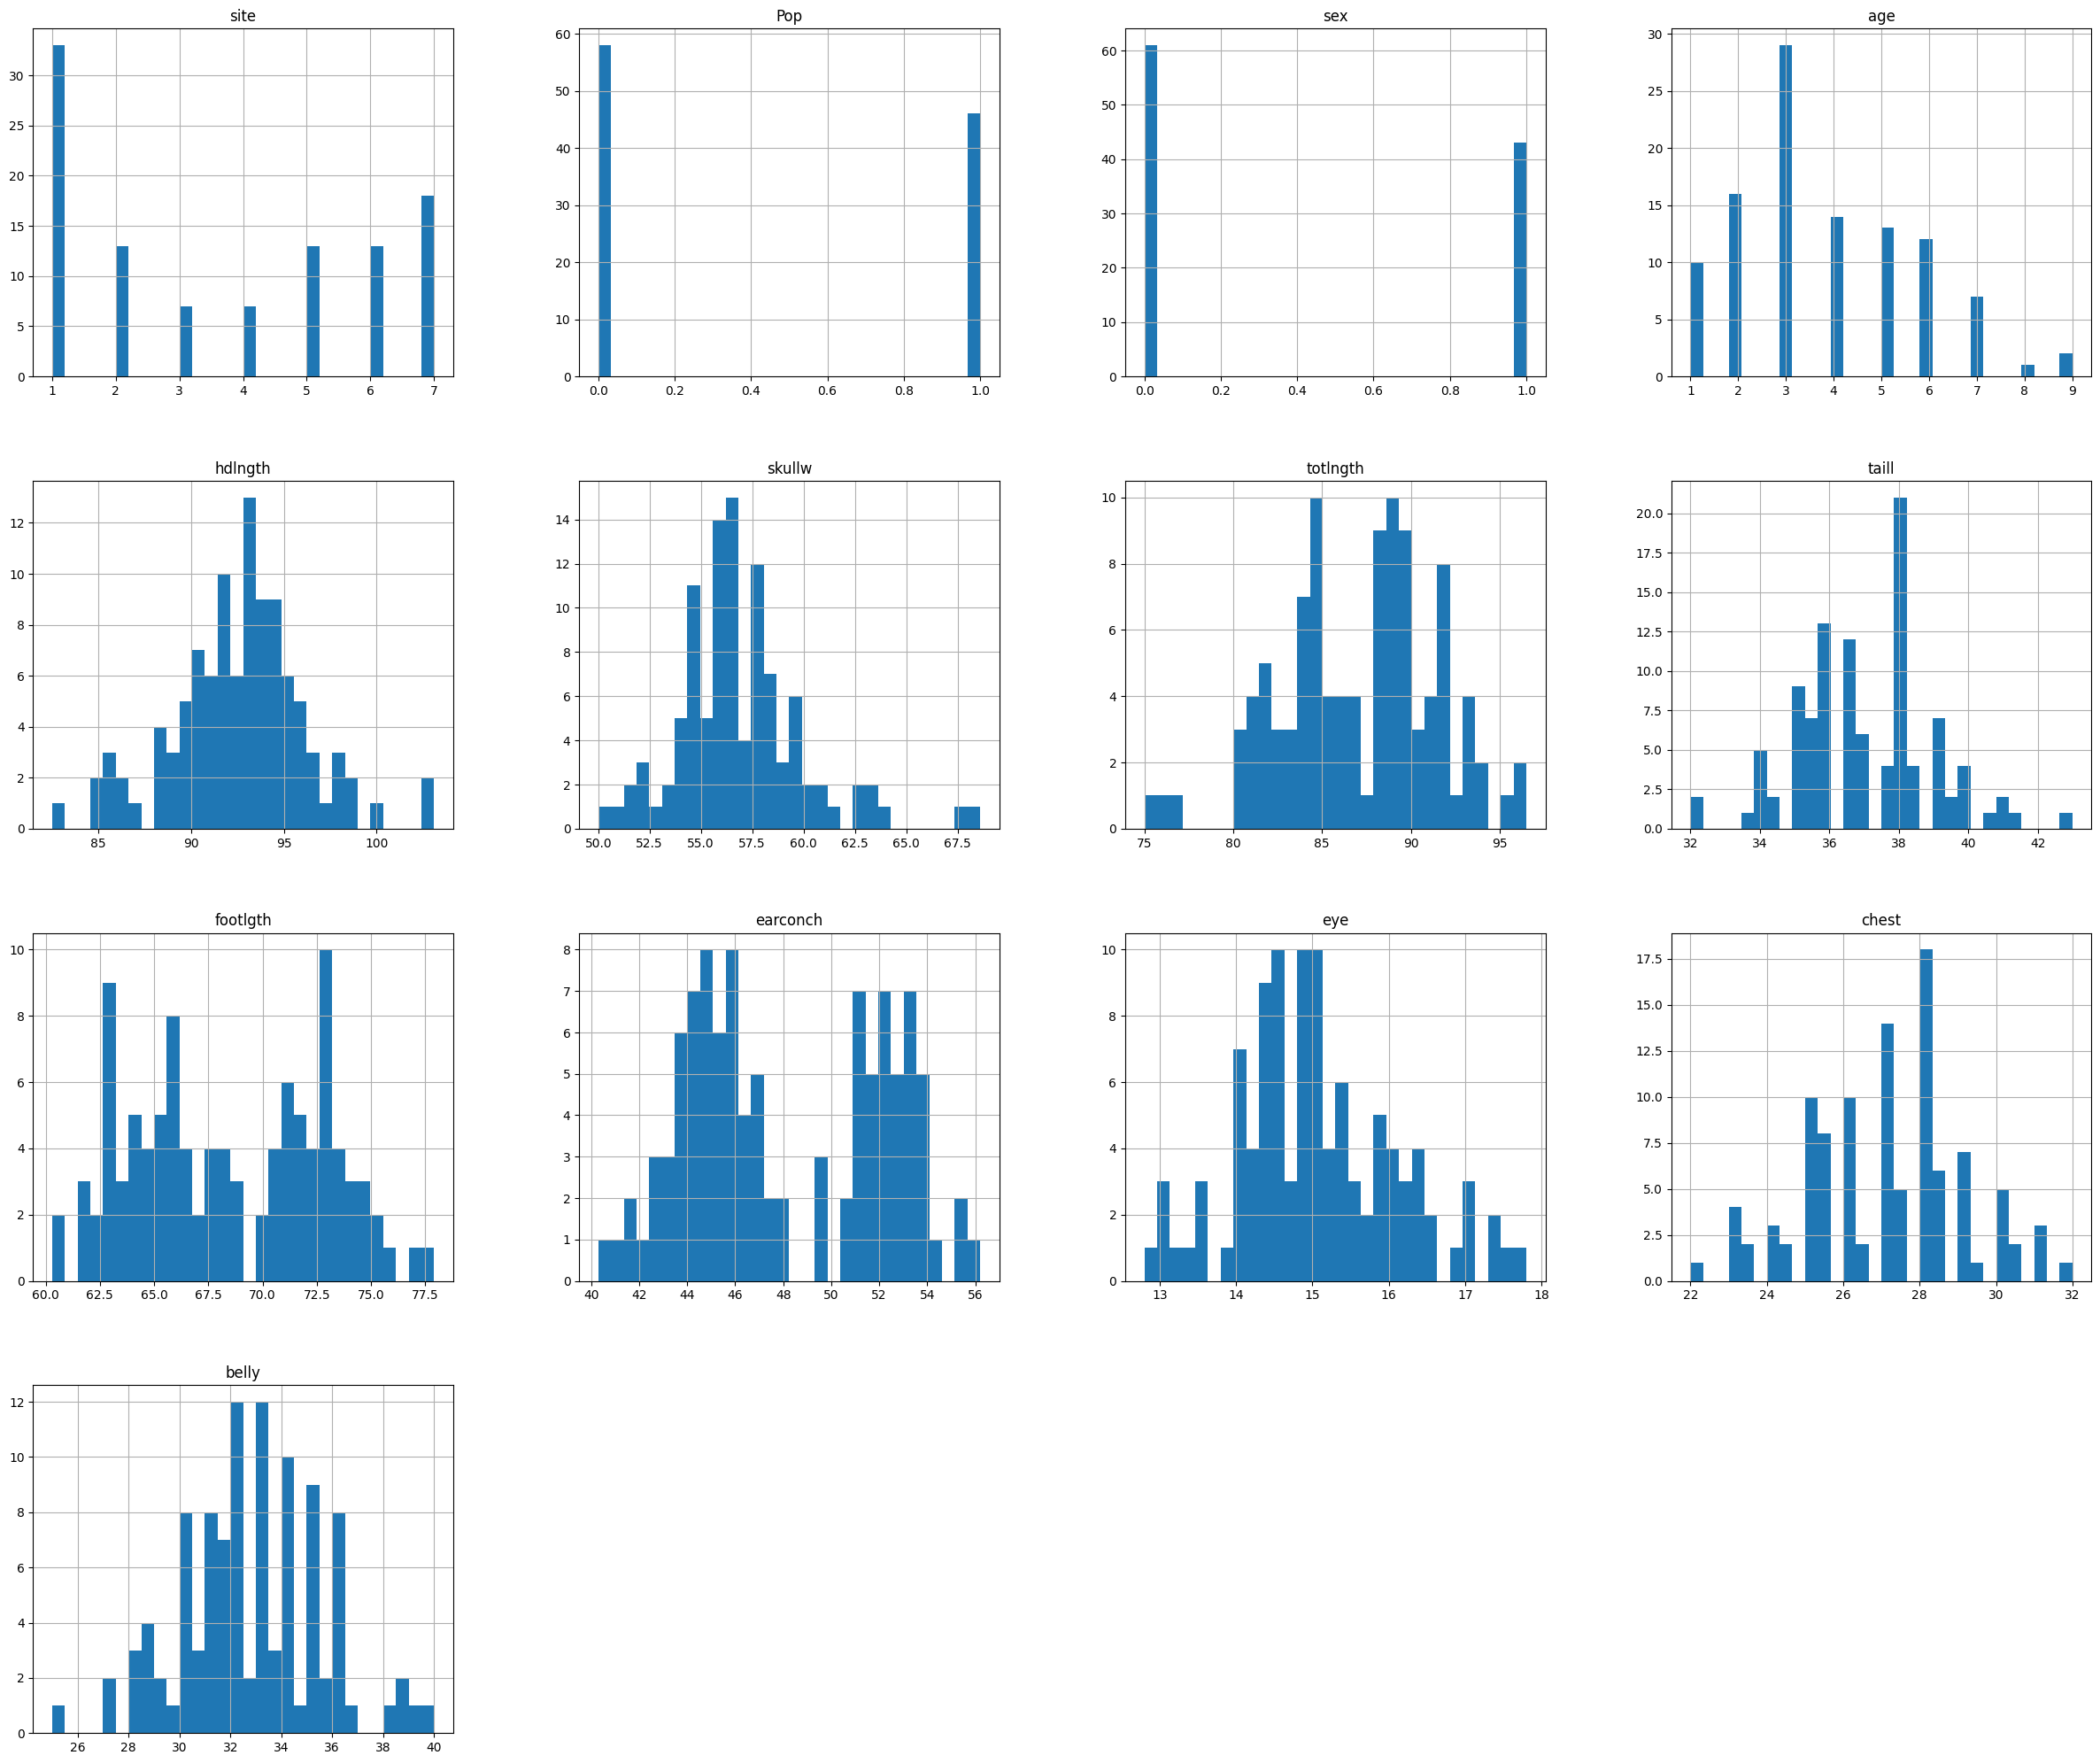

In [9]:
possum_df.hist(bins=30,figsize=(30,25))
plt.show()

### Scatter Plots

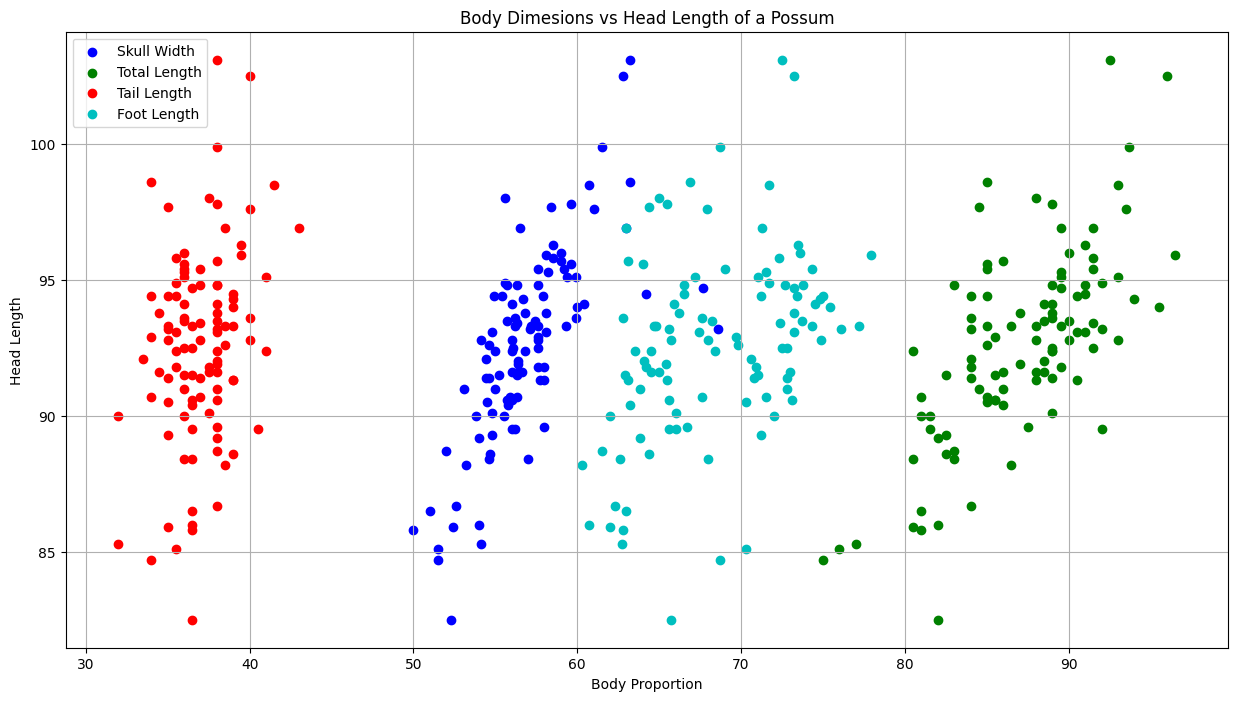

In [10]:
plt.figure(figsize=[15,8])
plt.scatter(x=possum_df['skullw'],y=possum_df['hdlngth'],label='Skull Width',c='b')
plt.scatter(x=possum_df['totlngth'],y=possum_df['hdlngth'],label='Total Length',c='g')
plt.scatter(x=possum_df['taill'],y=possum_df['hdlngth'],label='Tail Length',c='r')
plt.scatter(x=possum_df['footlgth'],y=possum_df['hdlngth'],label='Foot Length',c='c')
plt.title("Body Dimesions vs Head Length of a Possum")
plt.xlabel("Body Proportion")
plt.ylabel("Head Length")
plt.legend()
plt.grid()
plt.show()

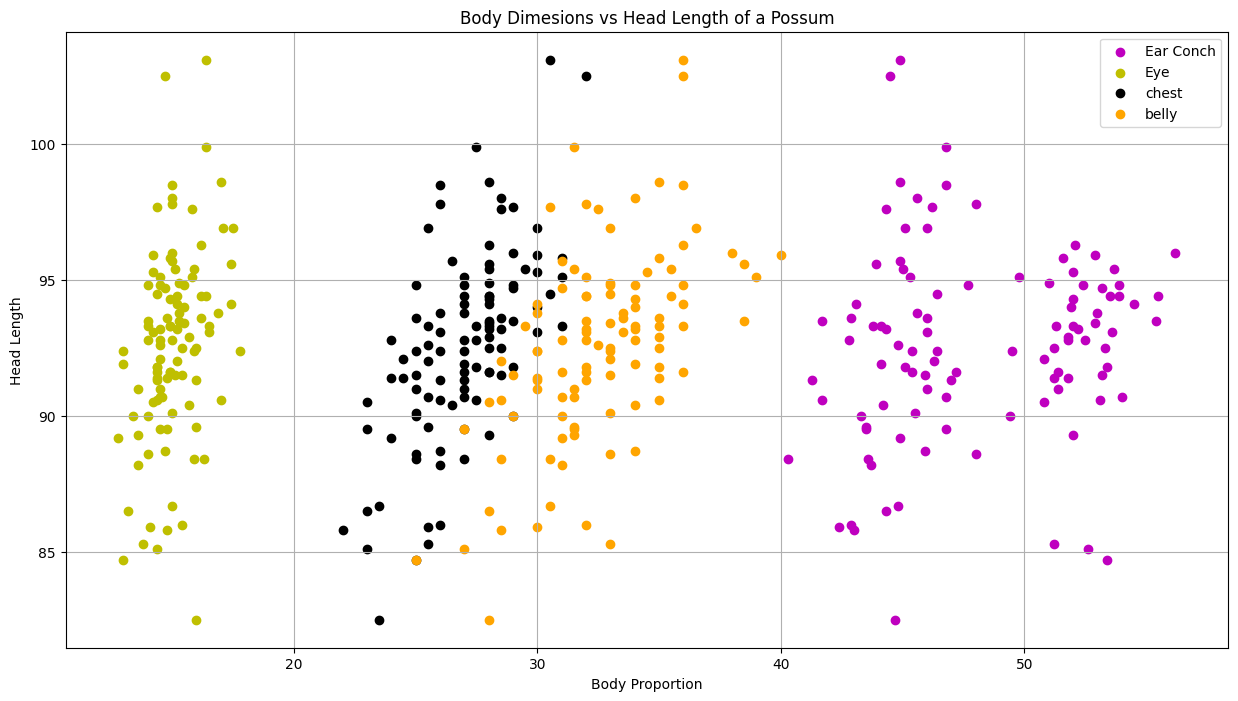

In [11]:
plt.figure(figsize=[15,8])
plt.scatter(x=possum_df['earconch'],y=possum_df['hdlngth'],label='Ear Conch',c='m')
plt.scatter(x=possum_df['eye'],y=possum_df['hdlngth'],label='Eye',c='y')
plt.scatter(x=possum_df['chest'],y=possum_df['hdlngth'],label='chest',c='k')
plt.scatter(x=possum_df['belly'],y=possum_df['hdlngth'],label='belly',c='orange')
plt.title("Body Dimesions vs Head Length of a Possum")
plt.xlabel("Body Proportion")
plt.ylabel("Head Length")
plt.legend()
plt.grid()
plt.show()

### Heatmap

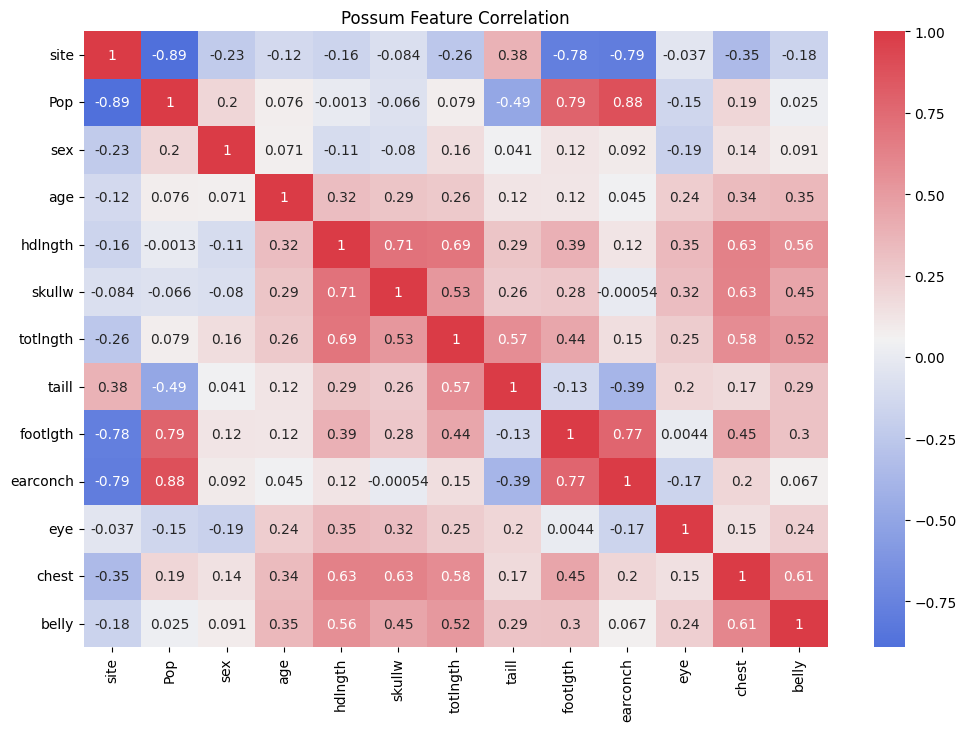

In [12]:
plt.figure(figsize=[12,8])

mask = np.zeros_like(possum_df.corr(), dtype=bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(260, 10, as_cmap=True)

sns.heatmap(possum_df.corr(),annot=True,cmap=cmap)
plt.title("Possum Feature Correlation")
plt.show()

# Building a Linear Regression Model

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

In [14]:
X = possum_df[['skullw','totlngth','chest','belly']].values
Y = possum_df['hdlngth'].values

In [15]:
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size = 0.2, random_state = 4)

In [16]:
model_lr = LinearRegression(fit_intercept=True)
model_lr.fit(train_X,train_Y)
train_pred_Y = model_lr.predict(train_X)
test_pred_Y = model_lr.predict(test_X)

In [17]:
train_mse = np.sqrt(mean_squared_error(train_pred_Y,train_Y))
test_mse = np.sqrt(mean_squared_error(test_pred_Y,test_Y))

In [18]:
print("Mean Square Error for training set:",round(train_mse,2))
print("Mean Square Error for testing set:",round(test_mse,2))

Mean Square Error for training set: 1.99
Mean Square Error for testing set: 2.34


In [19]:
print("R2_score:",round(r2_score(test_pred_Y,test_Y),2))

R2_score: 0.56


Text(0, 0.5, 'Predicted Y')

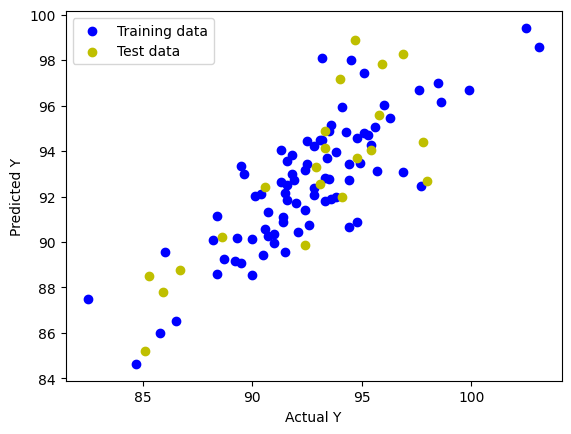

In [20]:
plt.scatter(train_Y,train_pred_Y,label='Training data',c='b')
plt.scatter(test_Y,test_pred_Y,label="Test data",c='y')
plt.legend()
plt.xlabel("Actual Y")
plt.ylabel("Predicted Y")

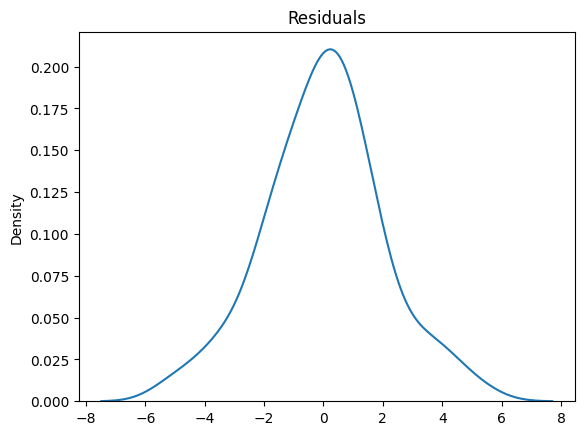

In [21]:
sns.kdeplot(train_Y-train_pred_Y)
plt.title("Residuals")
plt.show()

In [22]:
coeffiencts = pd.DataFrame()
coeffiencts['Possum Features'] = ['skullw','totlngth','chest','belly']
coeffiencts['Coefficents'] = list(model_lr.coef_)
coeffiencts.loc[len(coeffiencts)] = ['intercept',model_lr.intercept_]
coeffiencts

,Possum Features,Coefficents
0,skullw,0.534916
1,totlngth,0.264289
2,chest,0.081449
3,belly,0.237172
4,intercept,29.303814
